# Deep Learning Project
## Mask detection

Group members:
- Lorenzo Pigozzi	--- m20200745
- Marta
- Gustavo
- Salim




### Steps
1.	Importing data and setting the directions 
2.	Brief data preprocessing       
3.	Model architecture 
4.  Model assessment      
5.  Deployment

### 1. Importing libraries and setting the directions <a class="anchor" id="1"></a>

In [1]:
# importing needed libraries
#%tensorflow_version 1.x
import tensorflow
import pandas as pd
import numpy as np
import keras
import os, shutil
import io


# keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras import callbacks 

# sklearn
from sklearn.metrics import classification_report, confusion_matrix

# matplotlib
import matplotlib.pyplot as plt

Directions Google Colab

In [2]:

# # for downloading the pictures
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls '/content/gdrive'  # take a look at the Google Drive content

In [ ]:
# ######## defining the paths
# original_masks = "gdrive/MyDrive/Project Deeplearning/Pics_with_masks/withMaskDataset/withMaskDataset/"
# original_faces = "gdrive/MyDrive/Project Deeplearning/Images/"

In [2]:
# # !ls /content/gdrive/MyDrive/Project_Deeplearning
# base_dir = 'gdrive/MyDrive/Project Deeplearning/'

# # creationof the folder
# # os.mkdir(train_dir)
# # setting the direction of the train
# train_dir = os.path.join(base_dir, 'train')

# # creationof the folder
# # os.mkdir(validation_dir)
# # setting the direction of the train
# validation_dir=os.path.join(base_dir, 'validation')

# # creationof the folder
# # os.mkdir(test_dir)
# # setting the direction of the train
# test_dir=os.path.join(base_dir, 'test')

In [ ]:
# train_masks_dir=os.path.join(train_dir, 'masks')
# # os.mkdir(train_masks_dir)
# train_no_masks_dir=os.path.join(train_dir, 'no_masks')
# # os.mkdir(train_no_masks_dir)

# validation_masks_dir=os.path.join(validation_dir, 'masks')
# # os.mkdir(validation_masks_dir)
# validation_no_masks_dir=os.path.join(validation_dir, 'no_masks')
# # os.mkdir(validation_no_masks_dir)

# test_masks_dir=os.path.join(test_dir, 'masks')
# # os.mkdir(test_masks_dir)
# test_no_masks_dir=os.path.join(test_dir, 'no_masks')
# # os.mkdir(test_no_masks_dir)

In [ ]:
#### Splitting the images in the folders Train, Validation and Test

## Train = 70, Val 15, Test 15

#fnames = ['Masks{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#  src=os.path.join(original_masks, fname)
#  dst=os.path.join(train_masks_dir, fname)
#  shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(validation_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Masks{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_masks, fname)
#   dst=os.path.join(test_masks_dir, fname)
#   shutil.copyfile(src,dst)


#fnames = ['Faces{}.png'.format(i) for i in range(0,989)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(train_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(990,1201)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(validation_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

#fnames = ['Faces{}.png'.format(i) for i in range(1202,1413)]
#for fname in fnames:
#   src=os.path.join(original_faces, fname)
#   dst=os.path.join(test_no_masks_dir, fname)
#   shutil.copyfile(src,dst)

### 2. Model Architecture

In [2]:
# Sequential model | Create linear stack of layers
model = Sequential()

# Convolutional layer | Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(144,144, 3)))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))

# Flatten output of Conv
model.add(Flatten())
# Hidden layer
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

In [3]:
# compiling the model
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# visualizing the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 142, 142, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 161312)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                5162016   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,162,945
Trainable params: 5,162,945
Non-trainable params: 0
_________________________________________________________________


In [5]:
# scaling the data
train_datagen=ImageDataGenerator(rescale = 1./255)
validation_datagen=ImageDataGenerator(rescale = 1./255)
test_datagen=ImageDataGenerator(rescale = 1./255)

In [6]:
# importing the images
# flow when numpy array input, flow_from_directory when the inputs are directly images

training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (144, 144),
                                                 batch_size = 20,
                                                 color_mode="rgb",
                                                 class_mode = 'binary')


validation_set = validation_datagen.flow_from_directory('validation', 
                                                        target_size = (144, 144),
                                                        batch_size = 20,
                                                        color_mode="rgb",
                                                        class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (144, 144),
                                            batch_size = 20,
                                            class_mode = 'binary',
                                            shuffle = False)


Found 1978 images belonging to 2 classes.
Found 422 images belonging to 2 classes.
Found 422 images belonging to 2 classes.


In [8]:
# fitting the model
Epochs = 20

#hist=model.fit_generator(training_set,
#                         steps_per_epoch = 99,
#                         epochs = 1,
#                         validation_data = validation_set,
#                         validation_steps = 28)

#hist=model.fit_generator(training_set,
#                         validation_data = validation_set,
#                         epochs= Epochs ,
#                         steps_per_epoch = len(validation_set),
#                         validation_steps = len(validation_set)
#                         )


# hist=model.fit_generator(training_set,
#                          validation_data = validation_set,
#                          epochs = Epochs,
#                          steps_per_epoch = len(validation_set)
#                          )

hist=model.fit_generator(training_set,
                         steps_per_epoch = 49,
                         epochs = 20,
                         validation_data = validation_set,
                         validation_steps = 10
                         )

Epoch 1/20
49/49 [==============================] - 27s 555ms/step - loss: 0.0884 - accuracy: 0.9755 - val_loss: 0.3483 - val_accuracy: 0.8550
Epoch 2/20
49/49 [==============================] - 33s 667ms/step - loss: 0.0639 - accuracy: 0.9867 - val_loss: 0.2770 - val_accuracy: 0.9100
Epoch 3/20
49/49 [==============================] - 28s 569ms/step - loss: 0.0626 - accuracy: 0.9867 - val_loss: 0.3058 - val_accuracy: 0.8950
Epoch 4/20
49/49 [==============================] - 27s 550ms/step - loss: 0.0271 - accuracy: 0.9990 - val_loss: 0.2604 - val_accuracy: 0.9050
Epoch 5/20
49/49 [==============================] - 26s 534ms/step - loss: 0.0192 - accuracy: 0.9980 - val_loss: 0.3643 - val_accuracy: 0.8950
Epoch 6/20
49/49 [==============================] - 29s 595ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.3439 - val_accuracy: 0.8950
Epoch 7/20
49/49 [==============================] - 27s 542ms/step - loss: 0.0269 - accuracy: 0.9928 - val_loss: 0.3592 - val_accuracy: 0.9200

In [ ]:
# possible solution to solve the problem above

#from io import BytesIO
#BytesIO(b"0x7fbac83f9350")

In [ ]:
# # checking the information of the batch we split
# # checking if it makes sense with the size of the images

# batchX, batchy = train_iterator.next()
# print('Train Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = validation_iterator.next()
# print('Validation Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

# batchX, batchy = test_iterator.next()
# print('Test Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [9]:
# FINALLY OUR MODEL PREDICT

Y_pred = model.predict_generator(test_set, len(validation_set))    # ceil(num_of_test_samples / batch_size)

# changing the result as True and False
Y_pred = (Y_pred>0.5)



# if you have the last version of tensorflow, the predict_generator is deprecated.
# you should use the predict method.
# if you do not have the last version, you must use predict_generator

Instructions for updating:
Please use Model.predict, which supports generators.


In [10]:
Y_pred.shape

(422, 1)

In [11]:
test_set.classes.shape

(422,)

## Prediction assessment

In [12]:
# confusion matrix
print('Confusion matrix')
print(confusion_matrix(test_set.classes, Y_pred))

Confusion matrix
[[189  22]
 [ 31 180]]


In [13]:
# classification report
print('Classification Report')
target_names = ['No Mask', 'Mask']
print(classification_report(test_set.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

     No Mask       0.86      0.90      0.88       211
        Mask       0.89      0.85      0.87       211

    accuracy                           0.87       422
   macro avg       0.88      0.87      0.87       422
weighted avg       0.88      0.87      0.87       422



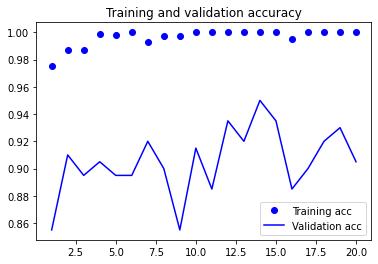

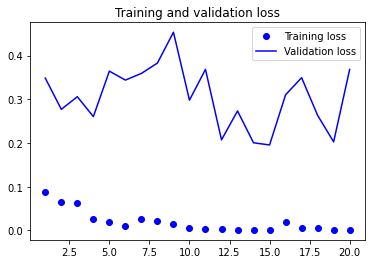

In [14]:
# plotting

# displaying the accuracy and loss over the training epochs
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Next Steps : improving the NN

In [ ]:
### Code for DATA AUGMENTATION

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# test set only rescaled
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Set callbacks to analyze the best number of epochs | Try 25,50, and 100

  earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                          mode ="min", patience = 5,  
                                          restore_best_weights = True) 
  
  history = model.fit(partial_images, partial_labels, batch_size = 128,  
                      epochs = 25, validation_data =(X_val, y_val),  
                      callbacks =[earlystopping]) 

In [ ]:
# Train the model for XXXXXX epochs
#model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=XXXXXXX)

In [ ]:
# Evaluate the model
_, acc = model.evaluate_generator(test_iterator, steps=len(test_iterator), verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))

### 4. Model assessment

### 5. Deployment

Example
https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

Problems websites

https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part1.ipynb

https://github.com/python-pillow/Pillow/issues/1006